# Project: No-Show Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project I have analyzed data from 100k medical appointments in Brazil to understand factors that are important in predicting whether a patient will show up to their appointment.  


### Question(s) for Analysis
>- **Does a certain gender tend to no-show more?**
- **Do certain dates and times have higher number of no-shows?**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('./data/no-show-appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.isna().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [7]:
df.duplicated().any()

False

In [8]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

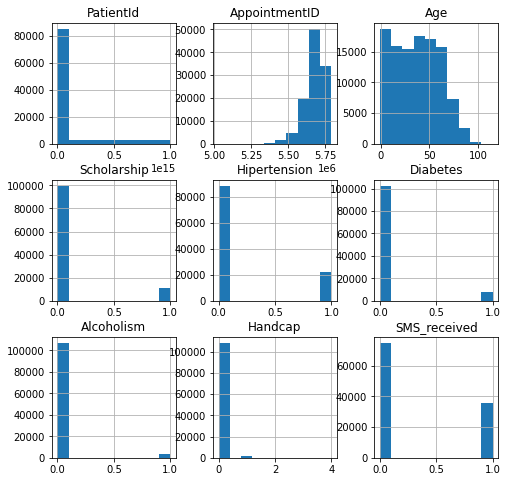

In [9]:
df.hist(figsize=(8,8));

In [10]:
#ScheduledDay and AppointmentDay
df[['ScheduledDay','AppointmentDay']].sample(10)

,ScheduledDay,AppointmentDay
62072,2016-04-06T14:14:15Z,2016-05-10T00:00:00Z
105548,2016-06-08T08:17:29Z,2016-06-08T00:00:00Z
82344,2016-04-15T16:30:33Z,2016-05-31T00:00:00Z
67451,2016-04-27T13:30:18Z,2016-05-19T00:00:00Z
63027,2016-03-07T08:33:04Z,2016-05-30T00:00:00Z
27600,2016-05-04T08:02:50Z,2016-05-04T00:00:00Z
49707,2016-05-05T14:06:25Z,2016-05-05T00:00:00Z
25363,2016-04-29T10:29:00Z,2016-05-19T00:00:00Z
30027,2016-05-05T11:41:30Z,2016-05-09T00:00:00Z
37544,2016-05-16T10:22:56Z,2016-05-17T00:00:00Z



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [11]:
df_clean = df.copy()

#### Standardize column names
> Here the column names are standardized to have lower case and include underscores when composed of multiple words.

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#clean columns
df_clean.columns = df_clean.columns.str.lower()
df_clean.rename(columns={"patientid": "patient_id", 
                   "appointmentid": "appointment_id",
                   "handcap": "handicap",
                  "scheduledday": "appointment_sched_date",
                  "appointmentday": "appointment_date",
                  "neighbourhood": "neighborhood",
                  "hipertension": "hypertension",
                  "no-show": "no_show"}, inplace=True)

#### Edit Data Types
> Here the data types are modified to better suit the data.  The following list shows the columns that are edited: 
* patient_id (float -> int64)
* gender (object -> category)
* appointment_sched_date (object -> datetime)
* appointment_date (object -> datetime)

In [13]:
df_clean.patient_id = df_clean.patient_id.astype('int64')
df_clean.gender = df_clean.gender.astype('category')

df_clean.appointment_sched_date = pd.to_datetime(df_clean.appointment_sched_date)
df_clean.appointment_date = pd.to_datetime(df_clean.appointment_date)

#df_clean.scholarship = df_clean.scholarship.astype('category')

#df_clean.hypertension = df_clean.hypertension.astype('category')
#df_clean.diabetes = df_clean.diabetes.astype('category')
#df_clean.alcoholism = df_clean.alcoholism.astype('category')
#df_clean.handicap = df_clean.handicap.astype('category')

#df_clean.sms_received = df_clean.sms_received.astype('category')

df_clean.no_show = df_clean.no_show.astype('category')


In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   patient_id              110527 non-null  int64              
 1   appointment_id          110527 non-null  int64              
 2   gender                  110527 non-null  category           
 3   appointment_sched_date  110527 non-null  datetime64[ns, UTC]
 4   appointment_date        110527 non-null  datetime64[ns, UTC]
 5   age                     110527 non-null  int64              
 6   neighborhood            110527 non-null  object             
 7   scholarship             110527 non-null  int64              
 8   hypertension            110527 non-null  int64              
 9   diabetes                110527 non-null  int64              
 10  alcoholism              110527 non-null  int64              
 11  handicap                11

#### Drop Columns
> Here the *patient_id* and *appointment_id* columns are dropped since we do not believe they will have any influence on whether or not the patient will miss their appointment.

In [15]:
df_clean.drop(['patient_id','appointment_id'], axis=1, inplace=True)

#### Clean age column
> Here the rows with ages 0 and -1 are removed.

In [16]:
df_clean.age.sort_values().unique()

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

In [17]:
df_clean = df_clean[(df_clean.age != -1) & (df_clean.age!= 0)]

In [18]:
df_clean.age.sort_values().unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115], dtype=int64)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Does a certain gender tend to no-show more?

In [90]:
def dist_plot(data, x, hue, labels, title):
    ''' A function to draw a distribution plot '''
    sns.displot(data=data, x=x, hue = hue, multiple='stack', binwidth=3);
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.title(title)

**Here the distribution of no shows per gender is plotted**

*First, the proportion of appointments for each gender are printed followed by the proportion of no shows.  After that a sub-set dataframe is created as df_gender. Finally, a distribution plot as a function of no shows and gender is created.*

In [57]:
# Gender distribution
df_clean.gender.value_counts(normalize=True)

F    0.655388
M    0.344612
Name: gender, dtype: float64

In [58]:
#No-show distribution
df_clean.no_show.value_counts(normalize=True)

No     0.797359
Yes    0.202641
Name: no_show, dtype: float64

In [59]:
df_gender = df_clean[['gender', 'age','no_show','neighborhood']]

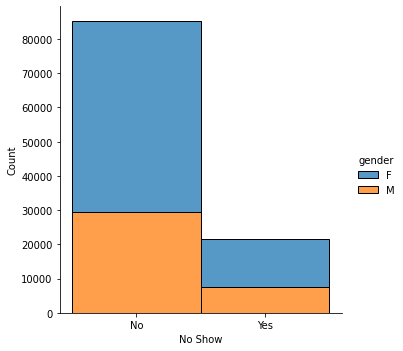

In [92]:
dist_plot(df_gender, 'no_show', 'gender', ['No Show','Count'], '')

**Here the proportion of of no shows per gender as a proportion of total appointments for each gender is plotted**

*This is to give us an idea of whether one gender tends to no show more overall.*

In [103]:
df_gender.groupby(['gender']).no_show.value_counts(normalize=True)

gender     
F       No     0.796415
        Yes    0.203585
M       No     0.799154
        Yes    0.200846
Name: no_show, dtype: float64

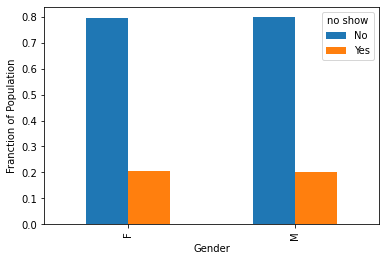

In [25]:
df_gender.groupby(['gender']).no_show.value_counts(normalize=True).unstack().plot.bar();
plt.legend(title='no show')
plt.xlabel('Gender')
plt.ylabel('Franction of Population')
plt.title('');

**Here the distribution of no-shows as a function of top-five neighborhoods with no-shows broken down by gender is plotted**

*First, a subset dataframe is created containing the top ten neighborhoods with highest number of no shows.  Then the distribution of no shows for each neighborhood is plotted as a proportion of the total number of appointments for each gender.*

In [27]:
nb_list = df_gender.groupby('no_show').neighborhood.value_counts().Yes[:5].index.to_list()

In [28]:
nb_data = df_clean[df_clean.neighborhood.isin(nb_list)]

In [29]:
nb_data = nb_data.groupby(['neighborhood','gender']).no_show.value_counts(normalize=True).unstack()

Text(0.5, 0, 'Neighborhood')

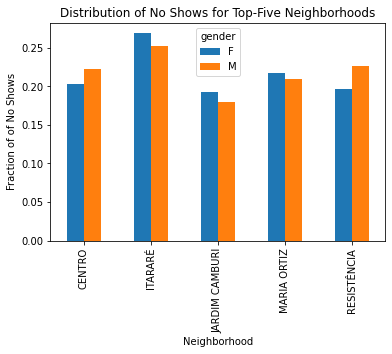

In [30]:
nb_data['Yes'].unstack().plot.bar();
plt.ylabel('Proportion of of No Shows');
plt.title('Distribution of No Shows for Top-Five Neighborhoods');
plt.xlabel('Neighborhood')

**Here the distribution of no shows as a function of age and gender is plotted**

*First an subset dataframe is created which only contains no show data.  Then top ten ages for each gender are printed to see the quantitative values.  Finally, the distribution of no shows as a function of age and gender is plotted using the dist_plot function.* 

In [102]:
age_data = df_clean[df_clean.no_show=='Yes'][['gender','age']]

In [101]:
# Top ten ages for females which no showed
age_data[age_data.gender=='F'].value_counts()[:10]

gender  age
F       30     291
        19     280
        21     270
        25     268
        22     266
        29     263
        20     262
        23     258
        28     255
        17     249
dtype: int64

In [34]:
# Top ten ages for males which no showed
age_data[age_data.gender=='M'].value_counts()[:10]

gender  age
M       9      228
        1      213
        8      176
        5      175
        10     172
        14     159
        6      159
        17     147
        7      146
        4      143
dtype: int64

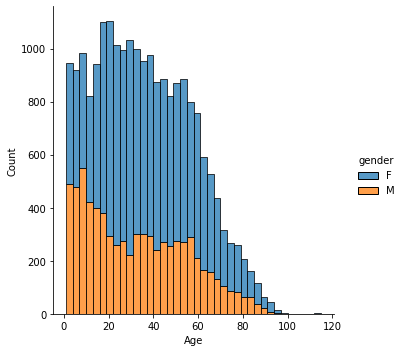

In [93]:
dist_plot(age_data, 'age', 'gender', ['Age','Count'], '')

### Do certain dates and times have higher number of no-shows?

In [94]:
def count_plot(data, x, hue, labels, title):
    ''' A function to draw a count plot '''
    sns.countplot(x=x, hue=hue, data=data);
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.title(title)
    

In [77]:
# Create dataframe containing gender, age, no show and datetime data.
df_dates = df_clean[['gender', 'age','no_show']]
df_dates['apt_sched_mnth'] = df_clean.appointment_sched_date.dt.month
df_dates['apt_sched_dow'] = df_clean.appointment_sched_date.dt.dayofweek
df_dates['apt_sched_hr'] = df_clean['appointment_sched_date'].dt.hour

df_dates.head()

C:\Users\Edgar\AppData\Local\Temp\ipykernel_146500\4030027799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates['apt_sched_mnth'] = df_clean.appointment_sched_date.dt.month
C:\Users\Edgar\AppData\Local\Temp\ipykernel_146500\4030027799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates['apt_sched_dow'] = df_clean.appointment_sched_date.dt.dayofweek
C:\Users\Edgar\AppData\Local\Temp\ipykernel_146500\4030027799.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,gender,age,no_show,apt_sched_mnth,apt_sched_dow,apt_sched_hr
0,F,62,No,4,4,18
1,M,56,No,4,4,16
2,F,62,No,4,4,16
3,F,8,No,4,4,17
4,F,56,No,4,4,16


**Here we will plot distribution of appointments per month for each gender using the count_plot function.**

*This is to give us an idea of the distribution of appointments over the entire year.*

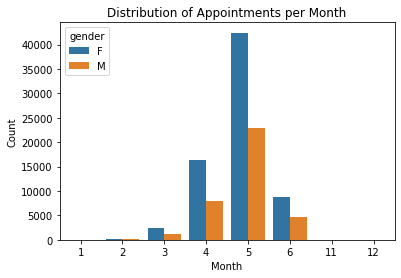

In [79]:
count_plot(df_dates, 'apt_sched_mnth', 'gender', ['Month','Count'], 'Distribution of Appointments per Month')

**Here we will plot distribution of no-shows per month as a proportion of the total number of appointments.**

*This is to understand how proportion of no shows changes over the year*

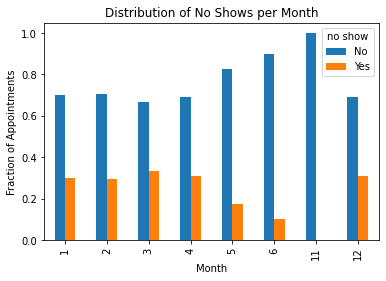

In [95]:
df_dates.groupby('apt_sched_mnth').no_show.value_counts(normalize=True).unstack().plot(kind='bar');
plt.xlabel('Month')
plt.ylabel('Proportion of Appointments')
plt.title('Distribution of No Shows per Month')
plt.legend(title='no show');

This plot gives us an idea of the distribution of appointments over the entire year.  Interestingly, 

**Here we will plot distribution of no-shows per day of week for each gender**

*This is to understand how the appointments are distributed over the week*

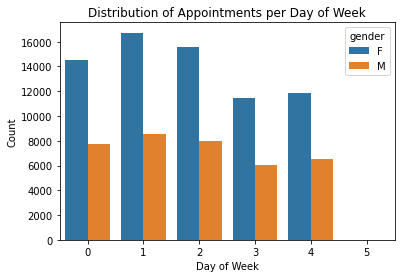

In [82]:
count_plot(df_dates, 'apt_sched_dow', 'gender', ['Day of Week','Count'], 'Distribution of Appointments per Day of Week')

**Here we will plot the distribution of no-shows per day of week as a proportion of the total number of appointments per day**

*This is to understand how the proportion no shows are distributed over the week*

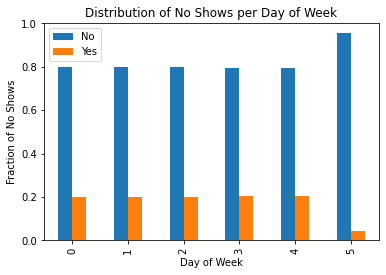

In [97]:
df_dates.groupby('apt_sched_dow').no_show.value_counts(normalize=True).unstack().plot(kind="bar");
plt.xlabel('Day of Week')
plt.ylabel('Fraction of No Shows')
plt.title('Distribution of No Shows per Day of Week');

**Here we will plot the distribution Distribution of appointments for each hour from 6am to 9pm**

*This is to understand how appointments are distributed over the day*

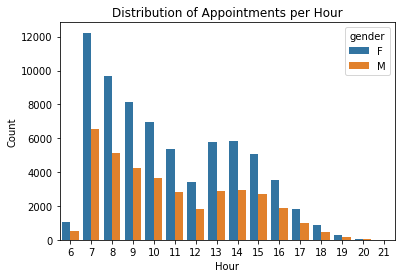

In [83]:
count_plot(df_dates, 'apt_sched_hr', 'gender', ['Hour','Count'], 'Distribution of Appointments per Hour')

**Here we will plot the distribution of no shows as a proportion of the total number of appoints in each hour from 6am to 9pm**

*This is to understand if the proportion of no shows favors a particular hour.*

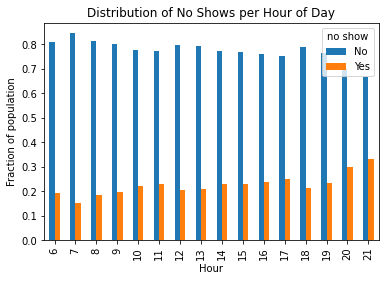

In [99]:
df_dates.groupby('apt_sched_hr').no_show.value_counts(normalize=True).unstack().plot(kind='bar');
plt.xlabel('Hour')
plt.ylabel('Fraction of population')
plt.title('Distribution of No Shows per Hour of Day')
plt.legend(title='no show');

<a id='conclusions'></a>
## Conclusions

### Summary

**Do certain genders tend to no-show more?** 
> - Overall, the  gender distribution is ~65% female and 35% male with only 20% of all appointments being no-shows.  
-Both genders miss their appointments ~ 20% of of the time.
-Females no-showed more than males for three out of the top-five neighborhoods with highest total no-shows.
-Females displayed higher number of no-shows when ages were in the 20s and 30s while males showed higher number of no-shows at ages below 20s. 

**Are no no shows more prevelant during certains times or days?** 
> - Distribution of appointments show a normal like behavior for both genders with the peak in May. No shows, however, tended to peak in March and gradually decreased going into November.  Interestingly, November shows zero no-shows then a ~30% month-to-month increase in December.
-Appointments are highest on Tuesdays.  No clear trends were found as a function of day of the week as percentage of no-shows remained steady at around 20% from Monday through Thursday with Friday being the only outlier at ~5%.
-Appointments showed a peak at 7am and decreased throughout the day until 1pm at which there was a 66% increase then a gradual decrease for the rest of the day. The number of no shows tended to increase throughout the day with some intermittent decreases from 11am-12pm and 5pm-6pm. 

### Limitations
> - When analyzing the relationship between gender and age, we do no know the age of the guardians who brought in younger clients.  Without this information we cannot make strong conclusions about the relationship between age and whether a client does not show for their appointment.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0